<a href="https://colab.research.google.com/github/pepetellez/BEDU-Data-Analysis/blob/main/Procesamiento-de-Datos-con-Python/8_Bases_de_datos_merge_y_agrupaciones/s8_r5_ratings_de_mas_valoradas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 5: Distribución de ratings de las películas más valoradas

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Creación de filtros usando `apply`
    
---
    
### 2. Desarrollo:

#### a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

`[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]`

Realiza los siguientes pasos:

1. Lee tus archivos `ratings` y `movies`.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
3. Crea una función que tome una lista de ids y un id y regrese `True` si el id se encuentra en la lista (puedes usar el operador `in` de Python).
4. Usa `apply` para aplicar esa función a la columna `ratings['movie_id']` y obtener un filtro.
5. Usa tu filtro para filtrar el `DataFrame` `ratings` y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
6. Usando `merge` agrega los nombres de las películas a tu `DataFrame` `ratings`. Asigna el resultado a la variable `ratings_filtrados_con_nombre`.

> **Nota** el paso #4 es algo complejo. Si tienes dificultades para realizarlo, ¡no dudes en pedirle ayuda a tu experta!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

#Lee tus archivos ratings y movies.
movies = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Datasets/MovieLens/movies-separated_by_money-raw.csv', sep="$", index_col=0)
ratings = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Datasets/MovieLens/ratings-raw.csv', index_col=0)

#Obtén una lista con los ids de las películas con más de 2500 valoraciones.Debe ser igual a la lista de arriba.
conteo_de_valoraciones = ratings['movie_id'].value_counts()
filtro_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones > 2500
conteo_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones[filtro_de_pelis_valoradas_mas_de_2500_veces]
ids_de_pelis_valoradas_mas_de_2500_veces = conteo_de_pelis_valoradas_mas_de_2500_veces.index

#Crea una función que tome una lista de ids y un id y regrese True si el id se encuentra en la lista
def id_esta_en_lista_de_ids(lista_de_ids, id_):
    return id_ in lista_de_ids

#Usa apply para aplicar esa función a la columna ratings['movie_id'] y obtener un filtro.
filtro_de_ratings = ratings['movie_id'].apply(lambda x: id_esta_en_lista_de_ids(ids_de_pelis_valoradas_mas_de_2500_veces, x))

#Usa tu filtro para filtrar el DataFrame ratings y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
ratings_filtrados = ratings[filtro_de_ratings]

#Usando merge agrega los nombres de las películas a tu DataFrame ratings. Asigna el resultado a la variable ratings_filtrados_con_nombre.
ratings_filtrados_con_nombre = pd.merge(ratings_filtrados, movies['title'], left_on='movie_id', right_index=True)
ratings_filtrados_con_nombre

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,movie_id,rating,timestamp,title
user_id,,,,
1,1270,5,978300055,Back to the Future (1985)
3,1270,3,978298231,Back to the Future (1985)
7,1270,4,978234581,Back to the Future (1985)
10,1270,4,978225735,Back to the Future (1985)
17,1270,5,978158536,Back to the Future (1985)
...,...,...,...,...
6026,1580,3,956726100,Men in Black (1997)
6027,1580,4,956726620,Men in Black (1997)
6033,1580,5,956714112,Men in Black (1997)


Pídele a tu experta la función de verificación `visualizar_boxplots` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado. Tu `DataFrame` debe de tener una columna `title` y otra `rating` para que la visualización pueda funcionar:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


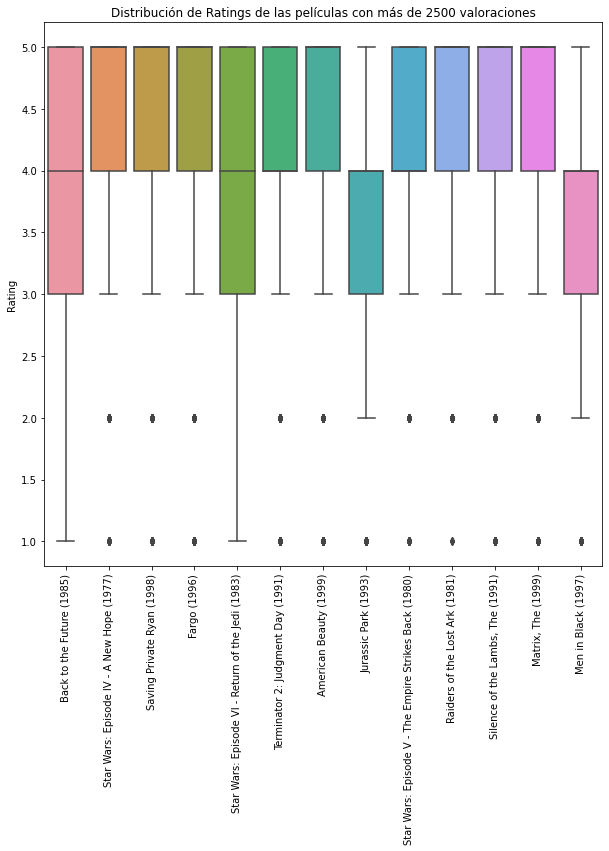

In [3]:
# Pega aquí la función de verificación 

def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(ratings_filtrados_con_nombre['title'], ratings_filtrados_con_nombre['rating'], ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

visualizar_boxplots(ratings_filtrados_con_nombre)

<details><summary>Solución</summary>

```python
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv')
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
conteo_de_valoraciones = ratings['movie_id'].value_counts()
filtro_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones > 2500
conteo_de_pelis_valoradas_mas_de_2500_veces = conteo_de_valoraciones[filtro_de_pelis_valoradas_mas_de_2500_veces]
ids_de_pelis_valoradas_mas_de_2500_veces = conteo_de_pelis_valoradas_mas_de_2500_veces.index
def id_esta_en_lista_de_ids(lista_de_ids, id_):
    return id_ in lista_de_ids
filtro_de_ratings = ratings['movie_id'].apply(lambda x: id_esta_en_lista_de_ids(ids_de_pelis_valoradas_mas_de_2500_veces, x))
ratings_filtrados = ratings[filtro_de_ratings]
ratings_filtrados_con_nombre = pd.merge(ratings_filtrados, movies['title'], left_on='movie_id', right_index=True)
```
    
</details>